<a href="https://colab.research.google.com/github/belogabriel/linear_regression/blob/main/regressao_mkt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.9/407.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.16.3
    Uninstalling pydantic_core-2.16.3:
      Successfully uninstalled pydantic_core-2.16.3
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.9.2
    Uninstalling pydantic-1.9.2:
      Successfully uninstalled pydantic-1.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.3.0 requires pydantic<1.10,>=1.8.1, but you have pydantic 2.7.0 which is incompatible.


In [10]:
# importing libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from ydata_profiling import ProfileReport

In [7]:
# Load data

data = pd.read_csv('/content/MKT.csv')

In [4]:
data.sort_values(by='sales')

,youtube,facebook,newspaper,sales
101,0.84,47.52,10.44,1.92
126,4.92,13.92,6.84,3.84
49,6.48,35.88,11.28,6.36
79,15.72,0.48,30.72,6.36
27,8.76,33.72,49.68,6.60
...,...,...,...,...
69,347.64,50.76,61.44,30.48
7,320.28,52.56,6.00,30.48
169,340.32,50.40,79.44,30.60
154,345.12,51.60,86.16,31.44


## DATA ANALYSIS


In [12]:
profile = ProfileReport(data, title='mkt sales')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
data.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
data.nunique()

youtube      165
facebook     145
newspaper    148
sales        112
dtype: int64

In [24]:
data.groupby(data.columns.tolist(), dropna=False).size().to_frame('n_duplicated').query('n_duplicated>1')

,,,,n_duplicated
youtube,facebook,newspaper,sales,


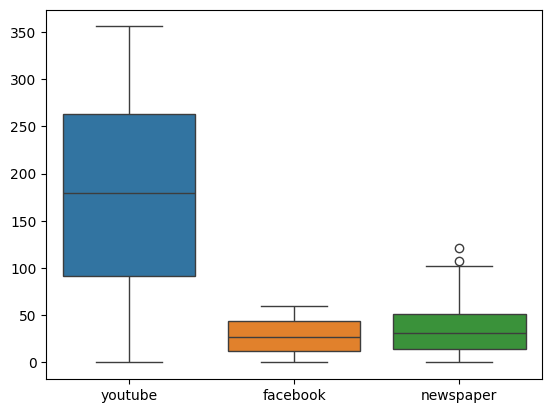

In [ ]:
sns.boxplot(data=X);

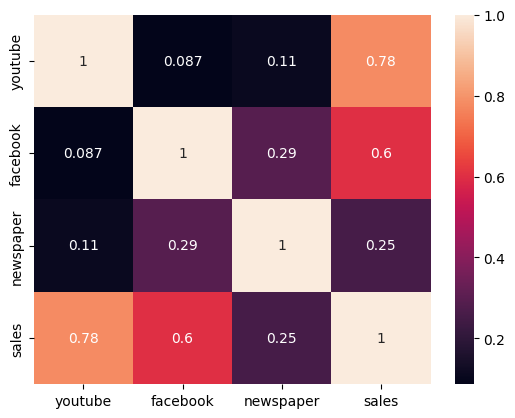

In [ ]:
sns.heatmap(data.corr(), annot=True);

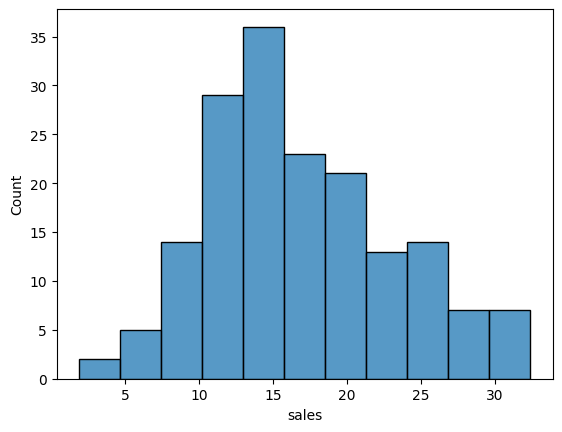

In [ ]:
sns.histplot(data["sales"]);

In [14]:
# separating the x variables from the target

data.columns
X = data[['youtube', 'facebook', 'newspaper']]
y = data[['sales']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=420)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
# modeling

lr = LinearRegression().fit(X_train, y_train)


In [ ]:
y_pred = lr.predict(X_test)
print(y_pred)

[[18.70672379]
 [13.91412759]
 [23.72324105]
 [18.63484437]
 [15.54136952]
 [10.56443836]
 [17.22753234]
 [14.82693397]
 [27.8655455 ]
 [18.19916428]
 [15.87224585]
 [27.96123334]
 [20.81868885]
 [22.87157002]
 [24.91757191]
 [20.34752659]
 [13.48760457]
 [11.81776023]
 [ 7.54023677]
 [11.46722879]
 [19.76432062]
 [12.04337928]
 [19.70191361]
 [10.37056012]
 [13.06345031]
 [23.95939497]
 [18.2358202 ]
 [16.79078642]
 [24.55929721]
 [12.92941767]
 [19.88963052]
 [25.30462023]
 [13.83802838]
 [12.08861668]
 [25.69951273]
 [10.1529099 ]
 [18.88763237]
 [16.57842392]
 [20.86718272]
 [19.24595024]
 [20.46070608]
 [12.43950675]
 [24.85817752]
 [11.89060076]
 [28.66244702]
 [26.19334056]
 [11.02549314]
 [17.19849498]
 [23.26960974]
 [22.505714  ]
 [17.50767468]
 [ 7.67037823]]


In [ ]:
# testing model metrics

r = r2_score(y_test, y_pred)
print('r²:', r)
print('RMSE:', np.sqrt(r))

r²: 0.8918346164197615
RMSE: 0.9443699573894552


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
regXGB = XGBRegressor().fit(X_train, y_train)

In [ ]:
yXGB = regXGB.predict(X_test)
MSEXGB = r2_score(y_test, yXGB)
RMSEXGB = np.sqrt(MSEXGB)

print('R² XGB:', MSEXGB)
print('RMSE XGB:', RMSEXGB)

R² XGB: 0.9825151106739214
RMSE XGB: 0.9912190023773361


In [ ]:
regXGB.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [ ]:
parameters = {"max_depth": [5,6,7],
              "learning_rate": [0.1,0.2,0.3],
              "objective": ['reg:squarederror'],
              "booster": ['gbtree'],
              "n_jobs": [5],
              "gamma": [0,1],
              "min_child_weight": [1,3],
              "max_delta_step": [0,1],
              "subsample": [0.5,1]
}

In [ ]:
xgbGrid = GridSearchCV(XGBRegressor(), parameters, refit='neg_mean_squared_error', verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
xgbGrid.best_params_

{'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_jobs': 5,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [ ]:
yGrid = xgbGrid.predict(X_test)

In [ ]:
MSEGrid = r2_score(y_test, yGrid)

In [ ]:
print('MSE XGB:', MSEGrid)
print('RMSE XGB:', np.sqrt(MSEGrid))

MSE XGB: 0.9838062957661423
RMSE XGB: 0.9918701002480831


In [ ]:
#it = [i for i in range(1, 120, 1)]
#fig = plt.figure(figsize=(12,8))
#plt.plot(it, y_test, color ='orange')
#plt.plot(it, y_pred, color = 'purple')
#plt.xlabel(sum('youtube', 'facebook', 'newsletter'));
#plt.ylabel("sales");